# Basic Operations

In this tutorial, we introduce the basic operations of climate datasets with `cfr`.

In [45]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate random data and form a `ClimateField`

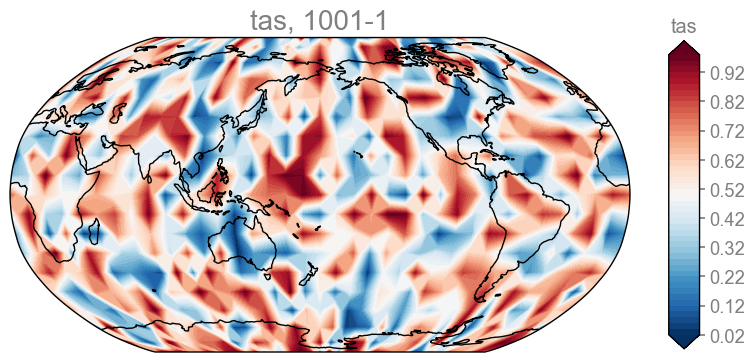

In [46]:
lat = np.arange(-90, 90.1, 10)
lon = np.arange(0, 360, 10)
time = np.arange(1001, 1002, 1)
data = np.random.rand(np.size(time), np.size(lat), np.size(lon))

fd = cfr.ClimateField().from_np(time, lat, lon, data)
fig, ax = fd.plot()

## Load test data to `ClimateField`

In [47]:
dirpath = './data/GCM_sims/icesm_last_millennium_historical'

In [48]:
fd_tas = cfr.ClimateField().load_nc(
    os.path.join(dirpath, 'tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'),
    vn='tas',
)

fd_pr = cfr.ClimateField().load_nc(
    os.path.join(dirpath, 'pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'),
    vn='pr',
)

fd_tas.vn='tas'
fd_pr.vn='pr'

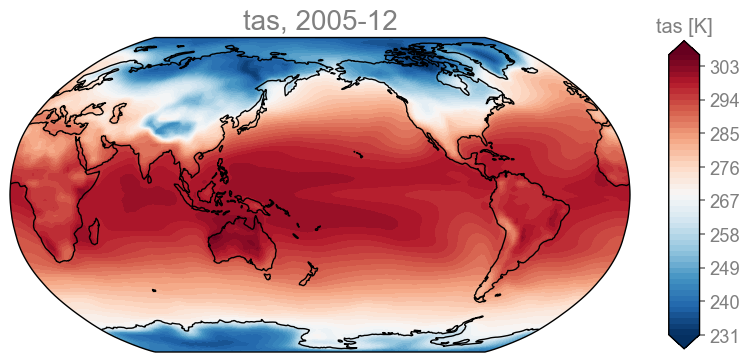

In [49]:
fig, ax = fd_tas[-1].plot()

## Rename the variable name of a `ClimateField`

In [50]:
fd_tas.da

<xarray.DataArray 'tas' (time: 13872, lat: 96, lon: 144)>
[191766528 values with dtype=float32]
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:  Reference height temperature
    units:      K

In [53]:
fd_tas_new = fd_tas.rename('temperature')
print(fd_tas_new.vn)

temperature
